In [255]:
#Please describe at least two ways of ensembling together DNNs and RFs. Take any dataset from Kaggle and

#(1) train an RF model (2) train a DNN, and (3) a hybrid DNN and RF model. 
#Provide detailed model and result comparison

In [256]:
#Ensemble methods are techniques that aim at improving the accuracy of
#results in models by combining multiple models instead of using
#a single model. The combined models increase the accuracy of the results significantly.
#This has boosted the popularity of ensemble methods in machine learning.


#Main Types of Ensemble Methods

#1. Bagging
#Bagging, the short form for bootstrap aggregating, is mainly applied in classification and regression.
#It increases the accuracy of models through decision trees, which reduces variance to a large extent.
#The reduction of variance increases accuracy, eliminating overfitting, which is a 
#challenge to many predictive models.

#2. Boosting
#Boosting is an ensemble technique that learns from previous predictor mistakes 
#to make better predictions in the future. The technique combines several weak base learners to 
#form one strong learner, thus significantly improving the predictability of models. 
#Boosting works by arranging weak learners in a sequence, such that weak learners learn from the next
#learner in the sequence to create better predictive models.

#3. Stacking
#Stacking, another ensemble method, is often referred to as stacked generalization.
#This technique works by allowing a training algorithm to ensemble several other similar learning 
#algorithm predictions. Stacking has been successfully implemented in regression, density estimations, 
#distance learning, and classifications. It can also be used to measure the error rate involved during bagging.

In [257]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from random import randint
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import cm 
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%config Completer.use_jedi = False

In [258]:
DATA_URL = '/Users/Venkat/Downloads/salary.csv'


In [259]:
unprocessed_data = pd.read_csv(DATA_URL)
data = pd.read_csv(DATA_URL)
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
salary            32561
dtype: int64

In [260]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [261]:
##Data cleaning and pre-processing

def normalize_field(dataset, field_name):
    dataset[field_name] = dataset[field_name] / dataset[field_name].max()
    return dataset

In [262]:
def one_hot_field(dataset, field_name):
    field_one_hot = pd.get_dummies(data[field_name], prefix=f"{field_name}=", prefix_sep="")
    dataset = pd.concat([data, field_one_hot], axis=1)
    dataset = dataset.drop([field_name], axis=1)
    return dataset

In [263]:
def binary_encode_field(dataset, field_name, new_name):
    unique_values = dataset[field_name].unique()
    replace_nums = {field_name: {unique_values[0]: 0, unique_values[1]: 1}}
    dataset = dataset.replace(replace_nums)
    dataset.columns = dataset.columns.str.replace(field_name, new_name)
    return dataset

In [264]:
#Split the fields into numerical / categorical / binary
numerical_fields = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_fields = ["workclass", "education", "marital-status", "occupation", "relationship", "race",
                      "native-country"]
binary_fields = ["sex", "salary"]
new_names = ["is_female", "salary_greater_than_50k"]

In [265]:
for field in numerical_fields:
    data = normalize_field(data, field)

In [266]:
for i, field in enumerate(binary_fields):
    data = binary_encode_field(data, field, new_names[i])

<AxesSubplot:>

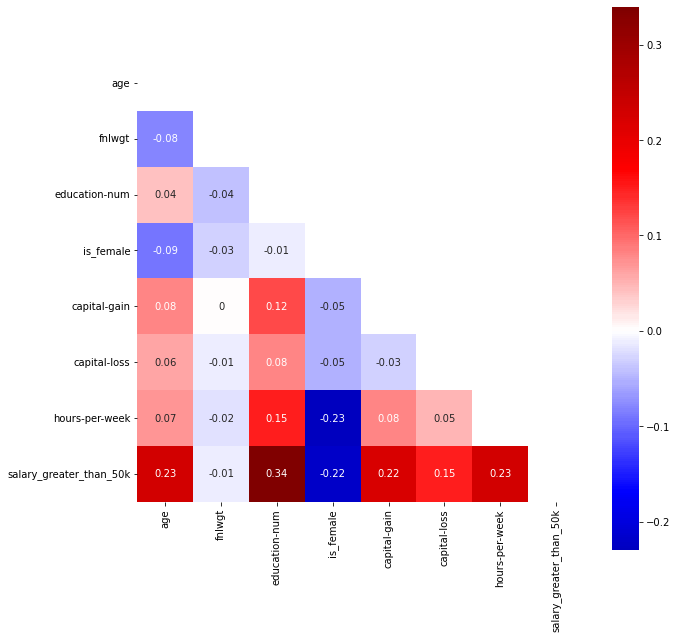

In [267]:
plt.figure(figsize=[10,10])
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(data.corr(),2), mask=mask, center=0, square=True, annot=True, annot_kws={"size":10},
            cmap=cm.seismic)

In [268]:
for field in categorical_fields:
    data = one_hot_field(data, field)

In [269]:
data.head()

,age,fnlwgt,education-num,is_female,capital-gain,capital-loss,hours-per-week,salary_greater_than_50k,workclass= ?,workclass= Federal-gov,...,native-country= Portugal,native-country= Puerto-Rico,native-country= Scotland,native-country= South,native-country= Taiwan,native-country= Thailand,native-country= Trinadad&Tobago,native-country= United-States,native-country= Vietnam,native-country= Yugoslavia
0,0.433333,0.052210,0.8125,0,0.02174,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.555556,0.056113,0.8125,0,0.00000,0.0,0.131313,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.422222,0.145245,0.5625,0,0.00000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.588889,0.158093,0.4375,0,0.00000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.311111,0.227930,0.8125,1,0.00000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#Split dataset in test/train
target = data["salary_greater_than_50k"]
features = data.drop(["salary_greater_than_50k"], axis=1)
input_shape = features.shape

In [271]:
SEED = 0
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=SEED)

In [272]:
#(Part 2- Train a DNN model)

In [273]:


#Deep neural model
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(100, activation='relu', name="1st_layer", input_shape=[input_shape[1]]),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(100, activation='relu', name="2nd_layer"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(100, activation='relu', name="3nd_layer"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(100, activation='relu', name="4nd_layer"),
              tf.keras.layers.Dense(1, activation='sigmoid', name="output_layer")
], name="model_1")

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
plot_model(model_1, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [274]:
history_1 = model_1.fit(x_train, y_train, 
                      epochs=30, 
                      batch_size=32, 
                      validation_data=(x_test, y_test),
                      verbose=False)

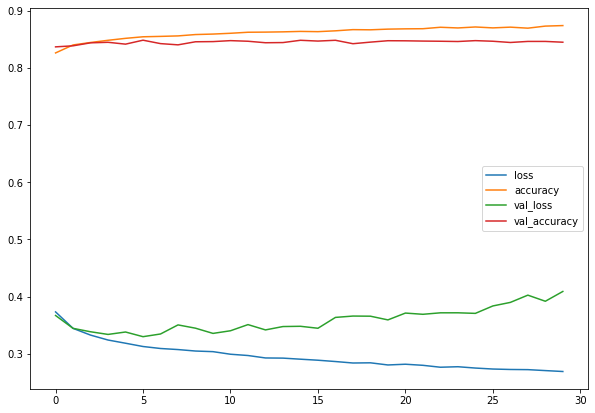

In [275]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [276]:
#Part(1) train a RF model

In [277]:
#(1)

#Random Forest Model
forest = RandomForestClassifier(n_estimators=5000, random_state=SEED, verbose=1)
forest = forest.fit(x_train, y_train)
forest.verbose = 0 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  7.0min finished


In [278]:
#Part(3) train a hybrid model

In [279]:
#(3) a hybrid DNN and RF model.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [280]:
train_rf1,test_rf1 = train_test_split(data,test_size=0.2,random_state=999)

In [281]:
print(data.describe(include = 'all'))

                age        fnlwgt  education-num     is_female  capital-gain  \
count  32561.000000  32561.000000   32561.000000  32561.000000  32561.000000   
mean       0.428685      0.127822       0.630042      0.330795      0.010777   
std        0.151560      0.071092       0.160795      0.470506      0.073854   
min        0.188889      0.008274       0.062500      0.000000      0.000000   
25%        0.311111      0.079361       0.562500      0.000000      0.000000   
50%        0.411111      0.120129       0.625000      0.000000      0.000000   
75%        0.533333      0.159662       0.750000      1.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       capital-loss  hours-per-week  salary_greater_than_50k  workclass= ?  \
count  32561.000000    32561.000000             32561.000000  32561.000000   
mean       0.020042        0.408459                 0.240810      0.056386   
std        0.092507        0.124722          

In [282]:
con_rf1 = ['age','fnlwgt', 'education-num','is_female',  'capital-gain' ,'capital-loss', 
           'hours-per-week',  'salary_greater_than_50k',  'workclass= ?','workclass= Federal-gov', 
           'native-country= Portugal','native-country= Puerto-Rico','native-country= Scotland',
           'native-country= South','native-country= Taiwan','native-country= Thailand',
           'native-country= Trinadad&Tobago','native-country= United-States','native-country= Vietnam',
           'native-country= Yugoslavia']
con_variables_rf1 = train_rf1[con_rf1]

In [283]:
Cor = con_variables_rf1.iloc[:,0:9]
Cor_matrxi = Cor.corr(method='pearson', min_periods=1)
print(Cor_matrxi)

                              age    fnlwgt  education-num  is_female  \
age                      1.000000 -0.077893       0.033920  -0.088061   
fnlwgt                  -0.077893  1.000000      -0.038012  -0.023833   
education-num            0.033920 -0.038012       1.000000  -0.018189   
is_female               -0.088061 -0.023833      -0.018189   1.000000   
capital-gain             0.076192  0.006960       0.122355  -0.053128   
capital-loss             0.058791 -0.010220       0.074247  -0.048691   
hours-per-week           0.067380 -0.024384       0.149585  -0.227605   
salary_greater_than_50k  0.235877 -0.009685       0.335012  -0.219074   
workclass= ?             0.038857 -0.003716      -0.074512   0.063986   

                         capital-gain  capital-loss  hours-per-week  \
age                          0.076192      0.058791        0.067380   
fnlwgt                       0.006960     -0.010220       -0.024384   
education-num                0.122355      0.074247     

In [284]:
con_variables_rf1['workclass= Federal-gov'] = con_variables_rf1['workclass= Federal-gov'].apply(lambda x:str(x))

/var/folders/6v/wb620prs6cvgfl25kb9tmwhw0000gn/T/ipykernel_93083/3749357720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_variables_rf1['workclass= Federal-gov'] = con_variables_rf1['workclass= Federal-gov'].apply(lambda x:str(x))


In [285]:
features_rf1 = train_rf1.iloc[:,0:54]
label_rf1 = train_rf1['workclass= Federal-gov']
clf_rf1 = ExtraTreesClassifier()
clf_rf1 = clf_rf1.fit(features_rf1, label_rf1)
model_rf1 = SelectFromModel(clf_rf1, prefit=True)
New_features_rf1 = model_rf1.transform(features_rf1)
print(New_features_rf1.shape)

(26048, 6)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [286]:
test_features_rf1 = test_rf1.iloc[:,0:54]
Test_features_rf1 = model_rf1.transform(test_features_rf1)

from sklearn.ensemble import RandomForestClassifier


Classifiers_rf1 = [RandomForestClassifier(n_estimators=200)]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [287]:
from sklearn.metrics import accuracy_score

Model_rf1 = []
Accuracy_rf1 = []
for clf_rf1 in Classifiers_rf1:
    fit_rf1=clf_rf1.fit(New_features_rf1,label_rf1)
    pred_rf1=fit_rf1.predict(Test_features_rf1)
    Model_rf1.append(clf_rf1.__class__.__name__)
    Accuracy_rf1.append(accuracy_score(test_rf1['workclass= Federal-gov'],pred_rf1))
    print('Accuracy of '+clf_rf1.__class__.__name__ +' is '+
          str(accuracy_score(test_rf1['workclass= Federal-gov'],pred_rf1)))

Accuracy of RandomForestClassifier is 1.0


In [294]:
# a hybrid DNN and RF model
# Building and training the DNN model on the RF model
#(selected 9 columns from 108 columns)

model2 = Sequential()
model2.add(Dense(9, input_dim=6,  activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(1,  activation='sigmoid'))

In [295]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [296]:
model2.fit(New_features_rf1,label_rf1, epochs=10, batch_size=10)

Epoch 1/10
2605/2605 [==============================] - 14s 4ms/step - loss: 0.0554 - accuracy: 0.9923
Epoch 2/10
2605/2605 [==============================] - 11s 4ms/step - loss: 1.1797e-04 - accuracy: 1.0000
Epoch 3/10
2605/2605 [==============================] - 23s 9ms/step - loss: 1.6251e-05 - accuracy: 1.0000
Epoch 4/10
2605/2605 [==============================] - 13s 5ms/step - loss: 3.1381e-06 - accuracy: 1.0000
Epoch 5/10
2605/2605 [==============================] - 190s 73ms/step - loss: 6.6793e-07 - accuracy: 1.0000
Epoch 6/10
2605/2605 [==============================] - 9s 3ms/step - loss: 1.5060e-07 - accuracy: 1.0000
Epoch 7/10
2605/2605 [==============================] - 7s 3ms/step - loss: 3.5394e-08 - accuracy: 1.0000
Epoch 8/10
2605/2605 [==============================] - 7s 3ms/step - loss: 8.9777e-09 - accuracy: 1.0000
Epoch 9/10
2605/2605 [==============================] - 8s 3ms/step - loss: 2.5979e-09 - accuracy: 1.0000
Epoch 10/10
2605/2605 [====================

In [297]:
scores_dnn = model2.evaluate(Test_features_rf1)


204/204 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [298]:
y_pred_dnn = model_1.predict(x_test)
y_pred_forest = forest.predict(x_test)

204/204 [==============================] - 1s 2ms/step


In [299]:
print("\tCLASIFICATION REPORT FOR NEURAL NET MODEL\n")
print(classification_report(y_test, np.round(y_pred_dnn)))

	CLASIFICATION REPORT FOR NEURAL NET MODEL

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4918
           1       0.72      0.61      0.66      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [300]:
print("\tCLASIFICATION REPORT FOR RANDOM FOREST MODEL\n")
print(classification_report(y_test, y_pred_forest))

	CLASIFICATION REPORT FOR RANDOM FOREST MODEL

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4918
           1       0.73      0.63      0.67      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [301]:
print(f"Accuracy for neural net model: \t\t{round(accuracy_score(y_test, np.round(y_pred_dnn)), 4) * 100}% ")
print(f"Accuracy for random forest model:\t{round(accuracy_score(y_test, y_pred_forest), 4) * 100}% ")
print("Accuracy for the Hybrid Model: \t\t%.2f%%" %(scores_dnn[1]*1+100))

Accuracy for neural net model: 		84.50999999999999% 
Accuracy for random forest model:	85.06% 
Accuracy for the Hybrid Model: 		100.00%


In [302]:
#The Hybrid Model has 100% accuracy whereas the other models are 84.85% & 85.06% accuracy
#Hybrid is the best performing model compared to the other models